In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [2]:
df1 = pd.read_csv("Data/India Agriculture Crop Production.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [3]:
for i in df1.columns:
    print(f"Unique values in {i} is {df1[i].nunique()}")

Unique values in State is 36
Unique values in District is 729
Unique values in Crop is 56
Unique values in Year is 24
Unique values in Season is 6
Unique values in Area is 48006
Unique values in Area Units is 1
Unique values in Production is 69078
Unique values in Production Units is 3
Unique values in Yield is 197154


In [4]:
Year = df1["Year"].unique()
print(Year)

['2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08'
 '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15'
 '2015-16' '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2000-01'
 '1997-98' '1998-99' '1999-00']


In [5]:
df1['Year'] = df1['Year'].str.extract(r'(\d+)', expand=False).astype(int)
print(df1["Year"].unique())

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2000 1997 1998 1999]


In [6]:
def clean_categorical_features(df):
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        df[col] = df[col].str.strip().str.lower()
    
    return df

df1 = clean_categorical_features(df1)

In [7]:
df1["Production Units"].unique()

array(['tonnes', 'nuts', 'bales'], dtype=object)

In [8]:
dfx = df1[df1["Production Units"]=="tonnes"]
dfy = df1[df1["Production Units"]=="nuts"]
dfz = df1[df1["Production Units"]=="bales"]

In [9]:
print("Ton df null values\n",dfx.isnull().sum(),"\n")
print("Nut df null values\n",dfy.isnull().sum(),"\n")
print("Bale df null values\n",dfz.isnull().sum(),"\n")

Ton df null values
 State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4687
Production Units       0
Yield                 33
dtype: int64 

Nut df null values
 State                0
District             0
Crop                 0
Year                 0
Season               0
Area                 0
Area Units           0
Production          36
Production Units     0
Yield                0
dtype: int64 

Bale df null values
 State                 0
District              0
Crop                  0
Year                  0
Season                0
Area                  0
Area Units            0
Production          270
Production Units      0
Yield                 0
dtype: int64 



In [10]:
def print_null_rows(df):
    null_mask = df.isnull().any(axis=1)
    null_rows = df[null_mask]
    print(null_rows)


In [11]:
dfx = dfx.dropna(subset=['Season'])
dfx = dfx.dropna(subset=['Crop'])
dfx = dfx.dropna(subset=['Production'])
dfy = dfy.dropna(subset=['Production'])
dfz = dfz.dropna(subset=['Production'])
print("Ton df null values\n",dfx.isnull().sum(),"\n")
print("Nut df null values\n",dfy.isnull().sum(),"\n")
print("Bale df null values\n",dfz.isnull().sum(),"\n")

Ton df null values
 State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64 

Nut df null values
 State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64 

Bale df null values
 State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64 



In [12]:
dfx.info()
dfy.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326999 entries, 0 to 345374
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             326999 non-null  object 
 1   District          326999 non-null  object 
 2   Crop              326999 non-null  object 
 3   Year              326999 non-null  int32  
 4   Season            326999 non-null  object 
 5   Area              326999 non-null  float64
 6   Area Units        326999 non-null  object 
 7   Production        326999 non-null  float64
 8   Production Units  326999 non-null  object 
 9   Yield             326999 non-null  float64
dtypes: float64(3), int32(1), object(6)
memory usage: 26.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2891 entries, 20 to 343483
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2891 non-null   object 
 1   Dist

In [13]:
for i in dfx.columns:
    print(f"Unique values in {i} is {dfx[i].nunique()}")

Unique values in State is 36
Unique values in District is 728
Unique values in Crop is 52
Unique values in Year is 24
Unique values in Season is 6
Unique values in Area is 46121
Unique values in Area Units is 1
Unique values in Production is 64373
Unique values in Production Units is 1
Unique values in Yield is 188361


In [14]:
for i in dfy.columns:
    print(f"Unique values in {i} is {dfy[i].nunique()}")

Unique values in State is 12
Unique values in District is 182
Unique values in Crop is 1
Unique values in Year is 23
Unique values in Season is 2
Unique values in Area is 2179
Unique values in Area Units is 1
Unique values in Production is 2631
Unique values in Production Units is 1
Unique values in Yield is 2742


In [15]:
for i in dfz.columns:
    print(f"Unique values in {i} is {dfz[i].nunique()}")

Unique values in State is 26
Unique values in District is 545
Unique values in Crop is 3
Unique values in Year is 23
Unique values in Season is 6
Unique values in Area is 4872
Unique values in Area Units is 1
Unique values in Production is 6072
Unique values in Production Units is 1
Unique values in Yield is 7975


In [16]:
dfx = dfx.drop(["Area Units", "Production Units", "Yield"],axis=1)
dfy = dfy.drop(["Area Units", "Production Units", "Yield"],axis=1)
dfz = dfz.drop(["Area Units", "Production Units", "Yield"],axis=1)
dfx.info()
dfy.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326999 entries, 0 to 345374
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       326999 non-null  object 
 1   District    326999 non-null  object 
 2   Crop        326999 non-null  object 
 3   Year        326999 non-null  int32  
 4   Season      326999 non-null  object 
 5   Area        326999 non-null  float64
 6   Production  326999 non-null  float64
dtypes: float64(2), int32(1), object(4)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2891 entries, 20 to 343483
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       2891 non-null   object 
 1   District    2891 non-null   object 
 2   Crop        2891 non-null   object 
 3   Year        2891 non-null   int32  
 4   Season      2891 non-null   object 
 5   Area        2891 non-null   float64
 6   Production  2891 

In [17]:
df1["Crop"].unique()

array(['arecanut', 'banana', 'black pepper', 'cashewnut', 'coconut',
       'dry chillies', 'ginger', 'other kharif pulses', 'other oilseeds',
       'rice', 'sugarcane', 'sweet potato', 'arhar/tur', 'bajra',
       'castor seed', 'coriander', 'cotton(lint)', 'gram', 'groundnut',
       'horse-gram', 'jowar', 'linseed', 'maize', 'mesta',
       'moong(green gram)', 'niger seed', 'onion', 'other rabi pulses',
       'potato', 'ragi', 'rapeseed &mustard', 'safflower', 'sesamum',
       'small millets', 'soyabean', 'sunflower', 'tapioca', 'tobacco',
       'turmeric', 'urad', 'wheat', 'oilseeds total', 'jute', 'masoor',
       'peas & beans (pulses)', 'barley', 'garlic', 'khesari', 'sannhamp',
       'guar seed', 'moth', 'cardamom', 'other cereals', 'cowpea(lobia)',
       'dry ginger', 'other summer pulses', nan], dtype=object)

In [18]:
df1[df1["State"]=="bihar"]["Crop"].unique()

array(['arhar/tur', 'bajra', 'banana', 'barley', 'castor seed',
       'coriander', 'dry chillies', 'garlic', 'ginger', 'gram',
       'groundnut', 'horse-gram', 'jowar', 'jute', 'khesari', 'linseed',
       'maize', 'masoor', 'mesta', 'moong(green gram)', 'onion',
       'other rabi pulses', 'other kharif pulses',
       'peas & beans (pulses)', 'potato', 'ragi', 'rapeseed &mustard',
       'rice', 'safflower', 'sannhamp', 'sesamum', 'small millets',
       'sugarcane', 'sunflower', 'sweet potato', 'tobacco', 'turmeric',
       'urad', 'wheat', 'soyabean', 'cotton(lint)', 'niger seed'],
      dtype=object)

In [19]:
df1["State"].unique()

array(['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'daman and diu', 'delhi',
       'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan',
       'sikkim', 'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'telangana', 'laddakh'], dtype=object)

In [20]:
df1["Season"].unique()

array(['kharif', 'whole year', 'rabi', 'autumn', 'summer', 'winter', nan],
      dtype=object)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [22]:
label_encoders1 = {}
label_encoders2 = {}
label_encoders3 = {}
categorical_features = ['State', 'District', 'Crop','Season']
for feature in categorical_features:
    le1 = LabelEncoder()
    le2 = LabelEncoder()
    le3 = LabelEncoder()
    dfx[feature] = le1.fit_transform(dfx[feature])
    label_encoders1[feature] = le1
    dfy[feature] = le2.fit_transform(dfy[feature])
    label_encoders2[feature] = le2
    dfz[feature] = le3.fit_transform(dfz[feature])
    label_encoders3[feature] = le3


In [23]:
scaler1a = MinMaxScaler()
scaler2a = MinMaxScaler()
scaler3a = MinMaxScaler()
scaler1b = MinMaxScaler()
scaler2b = MinMaxScaler()
scaler3b = MinMaxScaler()
scaler1c = MinMaxScaler()
scaler2c = MinMaxScaler()
scaler3c = MinMaxScaler()
numerical_features = ['Area', 'Production','Year']
# dfx[numerical_features[0]] = scaler1a.fit_transform(dfx[numerical_features[0]])
# dfy[numerical_features[0]] = scaler2a.fit_transform(dfy[numerical_features[0]])
# dfz[numerical_features[0]] = scaler3a.fit_transform(dfz[numerical_features[0]])
# dfx[numerical_features[1]] = scaler1b.fit_transform(dfx[numerical_features[1]])
# dfy[numerical_features[1]] = scaler2b.fit_transform(dfy[numerical_features[1]])
# dfz[numerical_features[1]] = scaler3b.fit_transform(dfz[numerical_features[1]])

if 'Area' in dfx.columns and 'Area' in dfy.columns and 'Area' in dfz.columns:
    dfx['Area'] = scaler1a.fit_transform(dfx[['Area']])
    dfy['Area'] = scaler2a.fit_transform(dfy[['Area']])
    dfz['Area'] = scaler3a.fit_transform(dfz[['Area']])

if 'Production' in dfx.columns and 'Production' in dfy.columns and 'Production' in dfz.columns:
    dfx['Production'] = scaler1b.fit_transform(dfx[['Production']])
    dfy['Production'] = scaler2b.fit_transform(dfy[['Production']])
    dfz['Production'] = scaler3b.fit_transform(dfz[['Production']])

if 'Year' in dfx.columns and 'Year' in dfy.columns and 'Year' in dfz.columns:
    dfx['Year'] = scaler1c.fit_transform(dfx[['Year']])
    dfy['Year'] = scaler2c.fit_transform(dfy[['Year']])
    dfz['Year'] = scaler3c.fit_transform(dfz[['Year']])

In [24]:
dfx.info()
dfy.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326999 entries, 0 to 345374
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       326999 non-null  int32  
 1   District    326999 non-null  int32  
 2   Crop        326999 non-null  int32  
 3   Year        326999 non-null  float64
 4   Season      326999 non-null  int32  
 5   Area        326999 non-null  float64
 6   Production  326999 non-null  float64
dtypes: float64(3), int32(4)
memory usage: 15.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 2891 entries, 20 to 343483
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       2891 non-null   int32  
 1   District    2891 non-null   int32  
 2   Crop        2891 non-null   int32  
 3   Year        2891 non-null   float64
 4   Season      2891 non-null   int32  
 5   Area        2891 non-null   float64
 6   Production  2891 non-null   f

In [25]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][-1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)

seq_length = 10
features = ['State', 'District', 'Crop', 'Year', 'Season', 'Area']
target = 'Production'
datax = dfx[features + [target]].values
datay = dfy[features + [target]].values
dataz = dfz[features + [target]].values

X1, y1 = create_sequences(datax, seq_length)
X2, y2 = create_sequences(datay, seq_length)
X3, y3 = create_sequences(dataz, seq_length)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32).to(device), torch.tensor(self.y[idx], dtype=torch.float32).to(device)


Using device: cuda


In [27]:
train_dataset1 = TimeSeriesDataset(X_train1, y_train1)
test_dataset1 = TimeSeriesDataset(X_test1, y_test1)
train_loader1 = DataLoader(train_dataset1, batch_size=32, shuffle=True)
test_loader1 = DataLoader(test_dataset1, batch_size=32, shuffle=False)

In [28]:
train_dataset2 = TimeSeriesDataset(X_train2, y_train2)
test_dataset2 = TimeSeriesDataset(X_test2, y_test2)
train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False)

In [29]:
train_dataset3 = TimeSeriesDataset(X_train3, y_train3)
test_dataset3 = TimeSeriesDataset(X_test3, y_test3)
train_loader3 = DataLoader(train_dataset3, batch_size=32, shuffle=True)
test_loader3 = DataLoader(test_dataset3, batch_size=32, shuffle=False)

In [30]:
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [31]:
input_dim = X_train1.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 1

rnn_model1 = RNNModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
lstm_model1 = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
gru_model1 = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)

In [32]:
input_dim = X_train2.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 1

rnn_model2 = RNNModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
lstm_model2 = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
gru_model2 = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)

In [33]:
input_dim = X_train3.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 1

rnn_model3 = RNNModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
lstm_model3 = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
gru_model3 = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)

In [34]:
import torch.optim as optim

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    xt = [0]
    yt = [0]
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        xt.append(epoch+1)
        yt.append(loss.item())
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
    
    xt = np.array(xt)
    yt = np.array(yt)
    plt.plot(xt,yt)
    plt.xlabel("Epochs")
    plt.ylabel("Avg_Epoch per Epoch")
    plt.title("Epoch vs Loss Plot")
    plt.show()


In [35]:
criterion1 = nn.MSELoss()
rnn_optimizer1 = optim.Adam(rnn_model1.parameters(), lr=0.001)
lstm_optimizer1 = optim.Adam(lstm_model1.parameters(), lr=0.001)
gru_optimizer1 = optim.Adam(gru_model1.parameters(), lr=0.001)

In [36]:
criterion2 = nn.MSELoss()
rnn_optimizer2 = optim.Adam(rnn_model2.parameters(), lr=0.001)
lstm_optimizer2 = optim.Adam(lstm_model2.parameters(), lr=0.001)
gru_optimizer2 = optim.Adam(gru_model2.parameters(), lr=0.001)

In [37]:
criterion3 = nn.MSELoss()
rnn_optimizer3 = optim.Adam(rnn_model3.parameters(), lr=0.001)
lstm_optimizer3 = optim.Adam(lstm_model3.parameters(), lr=0.001)
gru_optimizer3 = optim.Adam(gru_model3.parameters(), lr=0.001)

In [38]:
train_model(rnn_model1, train_loader1, criterion1, rnn_optimizer1, num_epochs=10)
train_model(lstm_model1, train_loader1, criterion1, lstm_optimizer1, num_epochs=10)
train_model(gru_model1, train_loader1, criterion1, gru_optimizer1, num_epochs=10)

Epoch 1/10, Loss: 0.0005319321644492447
Epoch 2/10, Loss: 3.494600605336018e-05
Epoch 3/10, Loss: 2.1669948182534426e-05
Epoch 4/10, Loss: 7.01111348462291e-05
Epoch 5/10, Loss: 9.378958930028602e-05
Epoch 6/10, Loss: 4.590809840010479e-05
Epoch 7/10, Loss: 1.6006547411961947e-06


Epoch 1/10, Loss: 0.017894860357046127
Epoch 2/10, Loss: 0.00847702194005251
Epoch 3/10, Loss: 0.008873913437128067
Epoch 4/10, Loss: 0.0037514767609536648
Epoch 5/10, Loss: 0.005532954353839159
Epoch 6/10, Loss: 0.004467933904379606
Epoch 7/10, Loss: 0.014080291613936424
Epoch 8/10, Loss: 0.019369933754205704
Epoch 9/10, Loss: 0.010844431817531586
Epoch 10/10, Loss: 0.0067885336466133595


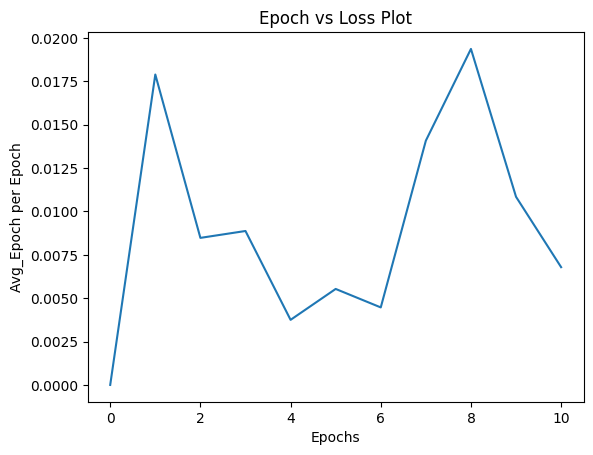

Epoch 1/10, Loss: 0.013118606992065907
Epoch 2/10, Loss: 0.004847434349358082
Epoch 3/10, Loss: 0.003026791615411639
Epoch 4/10, Loss: 0.029009360820055008
Epoch 5/10, Loss: 0.006498781498521566
Epoch 6/10, Loss: 0.004438487812876701
Epoch 7/10, Loss: 0.005510217975825071
Epoch 8/10, Loss: 0.005685003474354744
Epoch 9/10, Loss: 0.012626616284251213
Epoch 10/10, Loss: 0.006880796514451504


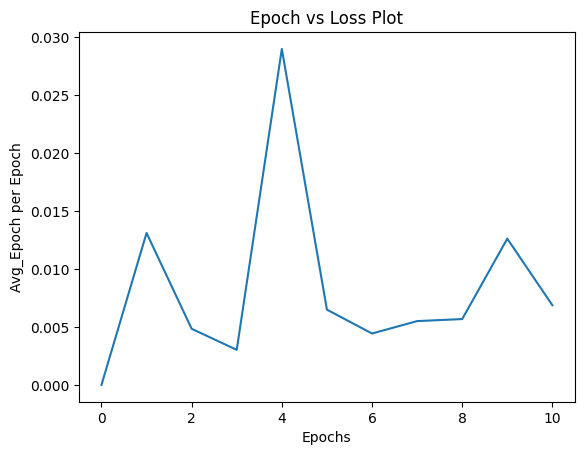

Epoch 1/10, Loss: 0.019038338214159012
Epoch 2/10, Loss: 0.005479560233652592
Epoch 3/10, Loss: 0.018087826669216156
Epoch 4/10, Loss: 0.008203770034015179
Epoch 5/10, Loss: 0.008836837485432625
Epoch 6/10, Loss: 0.006332903169095516
Epoch 7/10, Loss: 0.00710348691791296
Epoch 8/10, Loss: 0.0037207831628620625
Epoch 9/10, Loss: 0.0023833895102143288
Epoch 10/10, Loss: 0.016864197328686714


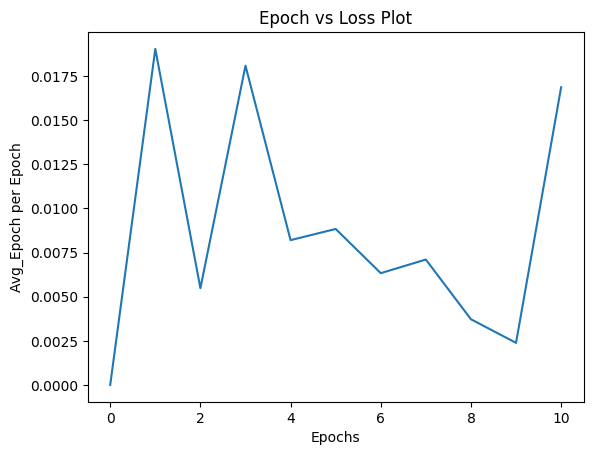

In [ ]:
train_model(rnn_model2, train_loader2, criterion2, rnn_optimizer2, num_epochs=10)
train_model(lstm_model2, train_loader2, criterion2, lstm_optimizer2, num_epochs=10)
train_model(gru_model2, train_loader2, criterion2, gru_optimizer2, num_epochs=10)

Epoch 1/10, Loss: 0.004228020086884499
Epoch 2/10, Loss: 0.0009583045612089336
Epoch 3/10, Loss: 0.01650596782565117
Epoch 4/10, Loss: 0.0034224072005599737
Epoch 5/10, Loss: 0.0007877983152866364
Epoch 6/10, Loss: 0.0031650729943066835
Epoch 7/10, Loss: 0.0006718189688399434
Epoch 8/10, Loss: 0.0012168126413598657
Epoch 9/10, Loss: 0.0010272657964378595
Epoch 10/10, Loss: 0.007064479868859053


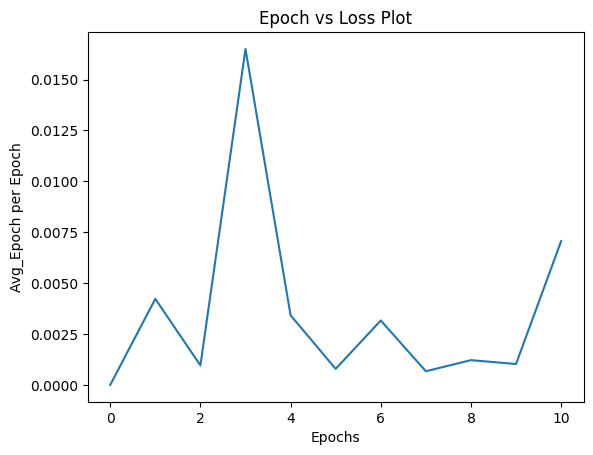

Epoch 1/10, Loss: 0.002584294881671667
Epoch 2/10, Loss: 0.008737600408494473
Epoch 3/10, Loss: 0.003352843225002289
Epoch 4/10, Loss: 0.003241585101932287
Epoch 5/10, Loss: 0.004470635671168566
Epoch 6/10, Loss: 0.009836470708251
Epoch 7/10, Loss: 0.0009284072439186275
Epoch 8/10, Loss: 0.005064164288341999
Epoch 9/10, Loss: 0.0015261255903169513
Epoch 10/10, Loss: 0.010707054287195206


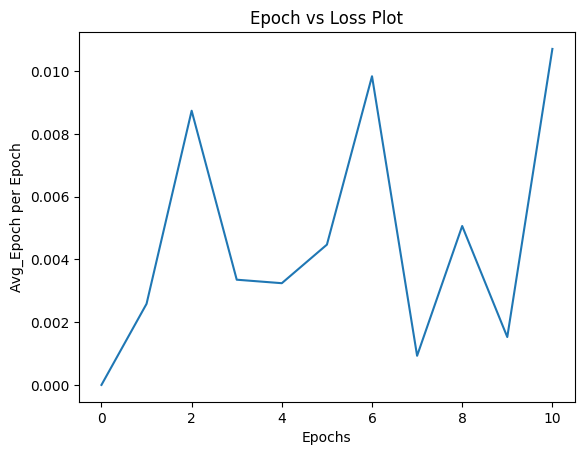

Epoch 1/10, Loss: 0.0062860450707376
Epoch 2/10, Loss: 0.0012476457050070167
Epoch 3/10, Loss: 0.001333216787315905
Epoch 4/10, Loss: 0.01590951532125473
Epoch 5/10, Loss: 0.000999730546027422
Epoch 6/10, Loss: 0.005296748131513596
Epoch 7/10, Loss: 0.008142393082380295
Epoch 8/10, Loss: 0.013467899523675442
Epoch 9/10, Loss: 0.002314159646630287
Epoch 10/10, Loss: 0.002510787220671773


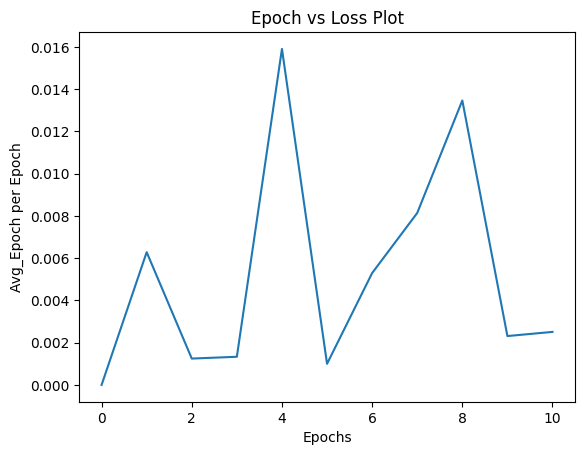

In [ ]:
train_model(rnn_model3, train_loader3, criterion3, rnn_optimizer3, num_epochs=10)
train_model(lstm_model3, train_loader3, criterion3, lstm_optimizer3, num_epochs=10)
train_model(gru_model3, train_loader3, criterion3, gru_optimizer3, num_epochs=10)

In [ ]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    avg_loss = total_loss / len(test_loader)
    return avg_loss

In [ ]:
rnn_loss1 = evaluate_model(rnn_model1, test_loader1, criterion1)
lstm_loss1 = evaluate_model(lstm_model1, test_loader1, criterion1)
gru_loss1 = evaluate_model(gru_model1, test_loader1, criterion1)

print(f'RNN Loss for Tonnes: {rnn_loss1}')
print(f'LSTM Loss for Tonnes: {lstm_loss1}')
print(f'GRU Loss for Tonnes: {gru_loss1}')

RNN Loss for Tonnes: 0.00018690391078145477
LSTM Loss for Tonnes: 0.00024741192957196547
GRU Loss for Tonnes: 0.000303382841385295


In [ ]:
rnn_loss2 = evaluate_model(rnn_model2, test_loader2, criterion2)
lstm_loss2 = evaluate_model(lstm_model2, test_loader2, criterion2)
gru_loss2 = evaluate_model(gru_model2, test_loader2, criterion2)

print(f'RNN Loss for Nuts: {rnn_loss2}')
print(f'LSTM Loss for Nuts: {lstm_loss2}')
print(f'GRU Loss for Nuts: {gru_loss2}')

RNN Loss for Nuts: 0.011251237126998603
LSTM Loss for Nuts: 0.013272382712066724
GRU Loss for Nuts: 0.011381075349881462


In [ ]:
rnn_loss3 = evaluate_model(rnn_model3, test_loader3, criterion3)
lstm_loss3 = evaluate_model(lstm_model3, test_loader3, criterion3)
gru_loss3 = evaluate_model(gru_model3, test_loader3, criterion3)

print(f'RNN Loss for Bales: {rnn_loss3}')
print(f'LSTM Loss for Bales: {lstm_loss3}')
print(f'GRU Loss for Bales: {gru_loss3}')

RNN Loss for Bales: 0.0045220481419660655
LSTM Loss for Bales: 0.00446556471411675
GRU Loss for Bales: 0.0048205638445462246


In [ ]:
import pickle

In [ ]:

for i in label_encoders1.keys():
    with open(f'Encoders/{i}_ton.pkl', 'wb') as f:
        pickle.dump(label_encoders1[i], f)

for i in label_encoders2.keys():
    with open(f'Encoders/{i}_nuts.pkl', 'wb') as f:
        pickle.dump(label_encoders2[i], f)

for i in label_encoders3.keys():
    with open(f'Encoders/{i}_bales.pkl', 'wb') as f:
        pickle.dump(label_encoders3[i], f)

with open(f'Scalers/sc_a_ton.pkl','wb') as f:
    pickle.dump(scaler1a, f)

with open(f'Scalers/sc_a_nuts.pkl','wb') as f:
    pickle.dump(scaler2a, f)

with open(f'Scalers/sc_a_bales.pkl','wb') as f:
    pickle.dump(scaler3a, f)
    
with open(f'Scalers/sc_b_ton.pkl','wb') as f:
    pickle.dump(scaler1b, f)

with open(f'Scalers/sc_b_nuts.pkl','wb') as f:
    pickle.dump(scaler2b, f)

with open(f'Scalers/sc_b_bales.pkl','wb') as f:
    pickle.dump(scaler3b, f)
    

In [ ]:
import torch.onnx

def export_to_onnx(model, input_size, file_name):
    dummy_input = torch.randn(1, *input_size).to(device)    
    torch.onnx.export(model, dummy_input, file_name, 
                      input_names=['input'], output_names=['output'], 
                      dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}})
    print(f'Model has been saved to {file_name}')

In [ ]:
input_size1 = (seq_length, X_train1.shape[2])
export_to_onnx(rnn_model1, input_size1, 'Models/rnn_model1.onnx')
export_to_onnx(lstm_model1, input_size1, 'Models/lstm_model1.onnx')
export_to_onnx(gru_model1, input_size1, 'Models/gru_model1.onnx')

c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\torch\onnx\symbolic_opset9.py:4662: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with RNN_TANH can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\torch\onnx\symbolic_opset9.py:4662: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\torch\onnx\symbolic_opset9.py:4662: UserWarning: Exporting a model to O

Model has been saved to Models/rnn_model1.onnx
Model has been saved to Models/lstm_model1.onnx
Model has been saved to Models/gru_model1.onnx


In [ ]:
input_size2 = (seq_length, X_train2.shape[2])
export_to_onnx(rnn_model2, input_size2, 'Models/rnn_model2.onnx')
export_to_onnx(lstm_model2, input_size2, 'Models/lstm_model2.onnx')
export_to_onnx(gru_model2, input_size2, 'Models/gru_model2.onnx')

Model has been saved to Models/rnn_model2.onnx
Model has been saved to Models/lstm_model2.onnx
Model has been saved to Models/gru_model2.onnx


In [ ]:
input_size3 = (seq_length, X_train3.shape[2])
export_to_onnx(rnn_model3, input_size3, 'Models/rnn_model3.onnx')
export_to_onnx(lstm_model3, input_size3, 'Models/lstm_model3.onnx')
export_to_onnx(gru_model3, input_size3, 'Models/gru_model3.onnx')

Model has been saved to Models/rnn_model3.onnx
Model has been saved to Models/lstm_model3.onnx
Model has been saved to Models/gru_model3.onnx


In [ ]:
X_train1.shape

(261591, 10, 7)